# K-means clustering
Created by: Martyna Stasiak

-----

To better understand what is K-means and clustering go over the slides from the third meeting of Intro to ML classes. <br>
In here we will practice the K-means algorithm, understand how to choose the number of clusters and see the implementation.<br>
The *introductory* part includes examples on simple dataset, followed by applying K-means on randomly generated data using `make_blobs` function from `sklearn.datasets`. Finally, we will apply K-means clustering on the well-known Iris dataset to see how it performs on real-world data.

We will cover the following steps:
1. **Simple Example of Clustering**: We will start with a simple dataset to understand the basic working of the K-means algorithm.
2. **K-means Clustering with `make_blobs`**: We will generate random data using `make_blobs` and apply K-means clustering to it.
3. **Elbow Method**: We will use the elbow method to determine the optimal number of clusters.
4. **Implementing K-means from Scratch**: We will implement the K-means algorithm from scratch to understand its inner workings.
5. **Applying K-means on the Iris Dataset**: We will apply K-means clustering on the Iris dataset and visualize the results.

*Don’t worry about the notebook’s size—it’s mostly filled with graphs! :)*

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # 3D plotting for last part of a notebook

### Simple example of clustering
First lets see how k-means works on a simple exaple, when we input our simple data by our own; later on we will chceck how it works on a random data, which we will create by using a sklearn's make_blobs function and finally on a hopefully fun dataset.

-----

We have 20 points


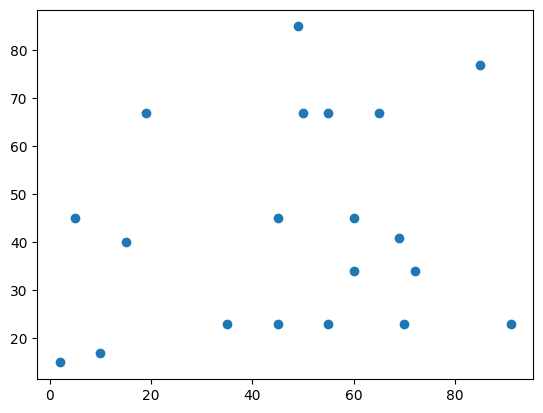

In [2]:
x = [2,10,15,85,69,49, 91, 72, 19, 5, 45, 55, 60, 35, 45, 50, 55, 60, 65, 70]
y = [15,17,40,77,41,85, 23, 34, 67, 45, 23, 67, 34, 23, 45, 67, 23, 45, 67, 23]
print(f"We have {len(x)} points")
plt.scatter(x, y)
plt.show()

So you can see that we have 20 points in our 'dataset'.<br>
now we run the k-means on the data and remember how the algorithm works- initial centroids are randomly chosen so when you run the cell below you might get different clusters each time;<br>
Also here the k is randomly chosen, feel free to change it and see what happends;

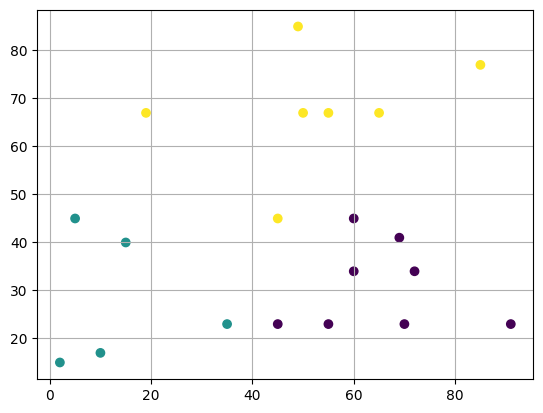

In [3]:
data = list(zip(x, y)) # zip the x and y coordinates together into a list of tuples so that we can use it as input to the KMeans algorithm
kmeans = KMeans(n_clusters=3) # we want to find 3 clusters in the data but feel free to change this number
kmeans.fit(data) # fit the data to the KMeans algorithm that means we are training the algorithm to find the clusters

plt.scatter(x, y, c=kmeans.labels_) # plot the data points and color (parameter c) them according to the cluster they belong to
plt.grid(True)
plt.show()

### K-means Clustering with make_blobs

In this section, we will use the `make_blobs` function from the `sklearn.datasets` module to generate a random dataset. The `make_blobs` function allows us to create a dataset with a specified number of clusters, samples, and features. This is useful for testing and visualizing clustering algorithms like k-means.

The `make_blobs` function generates isotropic Gaussian blobs for clustering. It allows us to specify the number of samples, the number of features, the number of centers (clusters), and the standard deviation of the clusters.

We will then apply the k-means algorithm to this generated dataset to find the clusters.

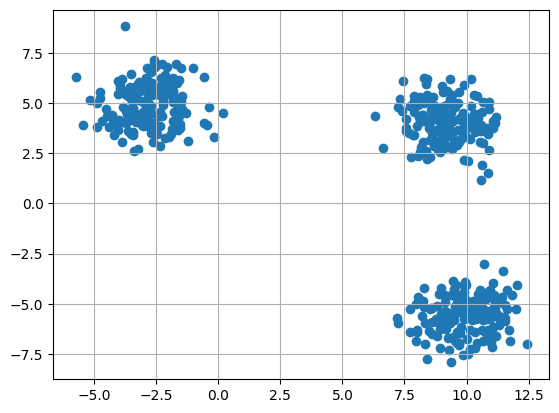

In [4]:
data, original_cluster = make_blobs(n_samples=500, centers=3, n_features=2, random_state=24) # generate some random data from make_blobs
# n_samples is the number of data points, centers is the number of clusters, n_features is the number of dimensions of the data
# data are all the data points(on data[0] we have x values and on data[1] we have y values) 
# and cluster is the cluster they belong to

plt.grid(True)
plt.scatter(data[:,0],data[:,1]) # plot the data points and color them according to the cluster they belong to

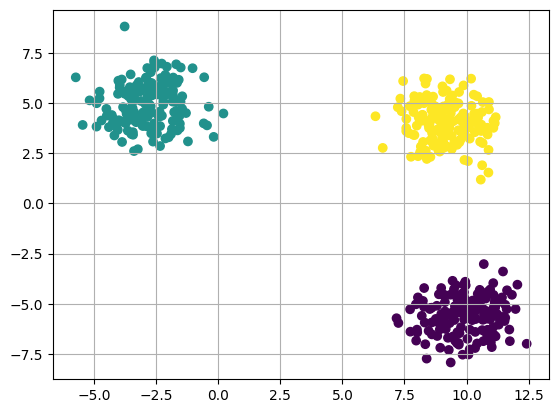

In [5]:
kmeans = KMeans(n_clusters=3) # we want to find 3 clusters in the data but feel free to change this number
kmeans.fit(data) # fit the data to the KMeans algorithm that means we are training the algorithm to find the clusters

KM_module_plot = plt.scatter(data[:,0], data[:,1], c=kmeans.labels_) # plot the data points and color (parameter c) them according to the cluster they belong to
plt.grid(True)
plt.show()

Now lets see if above approach matches the make_blob assignment to clusters; since in make_blobs we initially stated in the function how many clusters we wanted we actually may colour them accordingly to that (spoiler: it will)<br>
the colours do not mean anything particular just allow us to differenciate between clusters on the same plot so do not mind the different colours for make_blob clusters and k-means ones

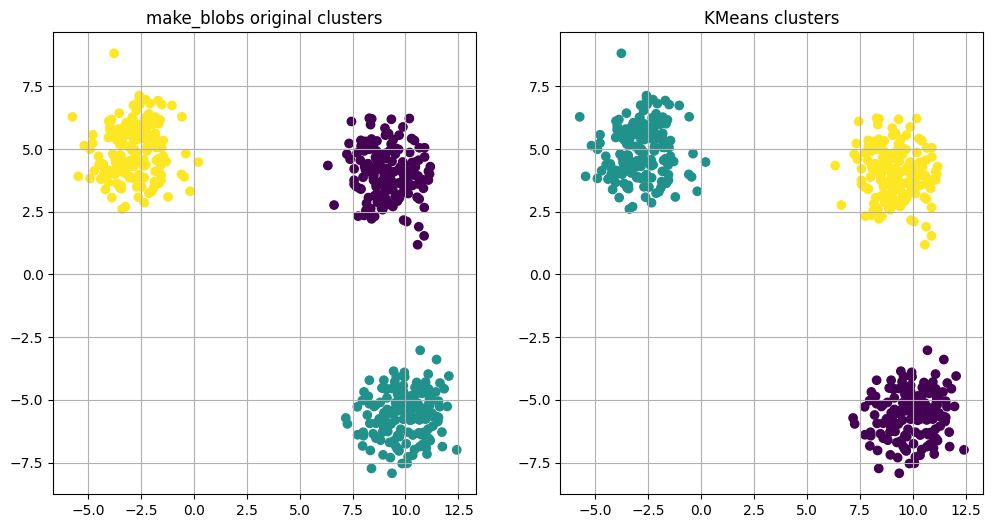

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # we create a figure with 2 subplots

# plot with the clusters from the make_blobs function
ax1.scatter(data[:, 0], data[:, 1], c=original_cluster)
ax1.set_title('make_blobs original clusters')
ax1.grid(True)

# plot with the clusters from the KMeans algorithm
ax2.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
ax2.set_title('KMeans clusters')
ax2.grid(True)

plt.show()

### How do we define the number of clusters?
As mentioned on a meeting for that we use the elbow method.

The elbow method is a technique used to determine the optimal number of clusters (k) in a k-means clustering algorithm. The method involves the following steps:

1. **Run k-means clustering** on the dataset for a range of values of k (e.g., from 1 to 10).
2. **Calculate the sum of squared distances (inertia)** between data points and their corresponding cluster centroids for each value of k.
3. **Plot the inertia values** against the number of clusters (k).
4. **Identify the "elbow point"** on the plot, which is the point where the rate of decrease in inertia slows down significantly. This point indicates the optimal number of clusters.

The idea behind the elbow method is that increasing the number of clusters will naturally reduce the inertia, but after a certain point, the improvement in inertia becomes marginal. The "elbow point" represents the trade-off between the number of clusters and the inertia, providing a balance between underfitting and overfitting.

**Inertia** is a measure of how well the data points are clustered around the centroids. It is calculated as the sum of squared distances between each data point and the centroid of the cluster to which it belongs. Lower inertia indicates better clustering.

---------


So lets see our blobs from before and analyze the elbow method- does it make sense?

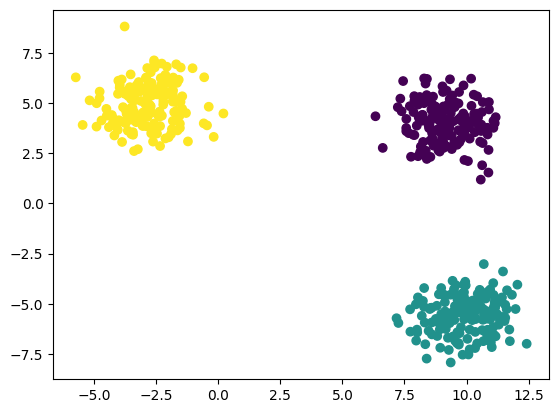

In [7]:
plt.scatter(data[:,0],data[:,1], c=original_cluster)

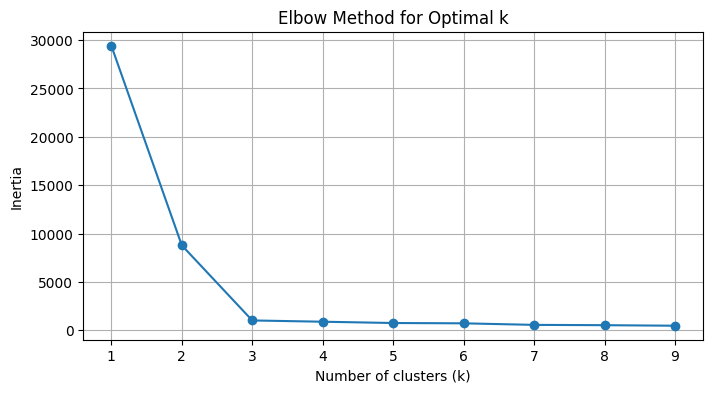

In [8]:
def elbow_method(data, k_range):
    inertia = [] # list to store the inertia values

    for k in k_range: # iterate over the range of k values
        kmeans = KMeans(n_clusters=k) # create a KMeans instance with k clusters
        kmeans.fit(data) # fit the data to the KMeans instance
        inertia.append(kmeans.inertia_) # append the inertia value to the inertia list

    plt.figure(figsize=(8, 4))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

elbow_method(data, range(1, 10)) # call the elbow_method function with the data and a range of k values

So as you can see it does make sense since we have used make_blobs function with 3 clusters and the `elbow point` represents k=3;
we may check it for different setups with make_blobs function by just changing the number of clusters:

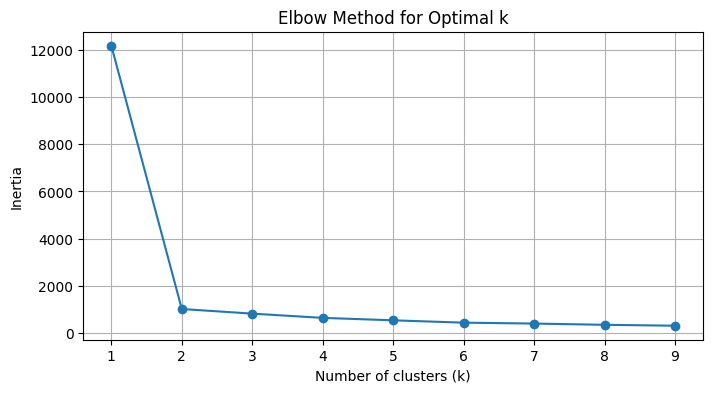

In [9]:
data1, original_cluster1 = make_blobs(n_samples=500, centers=2, n_features=2, random_state=24)
elbow_method(data1, range(1, 10))

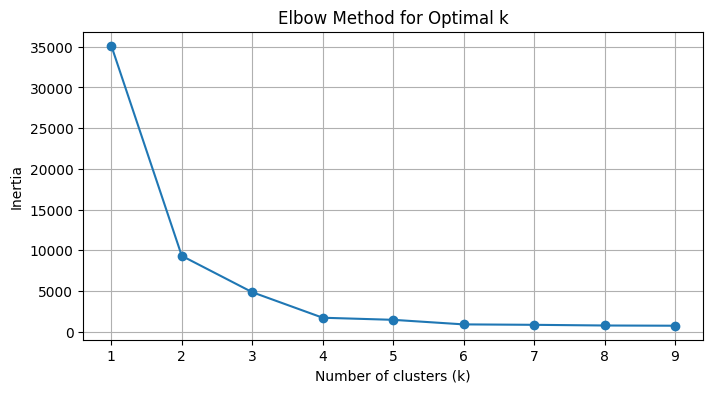

In [10]:
data2, original_cluster2 = make_blobs(n_samples=500, centers=6, n_features=2, random_state=24)
elbow_method(data2, range(1, 10))

### Why does the elbow point appear to be 4 when the data was created with 6 clusters?

When we use the elbow method to determine the optimal number of clusters, we look for the point where the inertia (sum of squared distances between data points and their corresponding cluster centroids) starts to decrease at a slower rate. And as you know this point is known as the "elbow point."

In the plot generated by the elbow method, we observe that the elbow point appears to be at 4 clusters, even though we specified 6 clusters when creating the data with `make_blobs`. There are a few reasons why this might happen:

1. **Cluster Overlap**: The clusters generated by `make_blobs` might overlap significantly, making it difficult for the k-means algorithm to distinguish between them. As a result, the algorithm might find that fewer clusters (like here, 4) provide a better fit for the data.

2. **Cluster Density**: The density of the clusters might vary, with some clusters being more spread out and others being more compact. The k-means algorithm might merge some of the less dense clusters, resulting in a lower optimal number of clusters.

3. **Random Initialization**: The k-means algorithm uses random initialization for the cluster centroids. Depending on the initial positions of the centroids, the algorithm might converge to different solutions. Running the algorithm multiple times with different initializations might yield different results.

4. **Elbow Method Subjectivity**: The elbow method is somewhat subjective, and the exact location of the elbow point can be open to interpretation. In some cases, the decrease in inertia might not be as pronounced, making it challenging to identify the optimal number of clusters.

When you look below at the graph you will see that the original clusters do in fact have the overlap, so that is the main reason why we might assume that 4 is the elbow point, but generally since the data here is similiar you may see that it would be enough to create 4 clusters. 

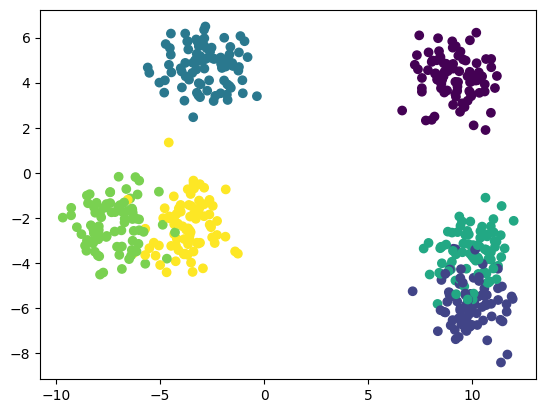

In [11]:
plt.scatter(data2[:,0],data2[:,1], c=original_cluster2)

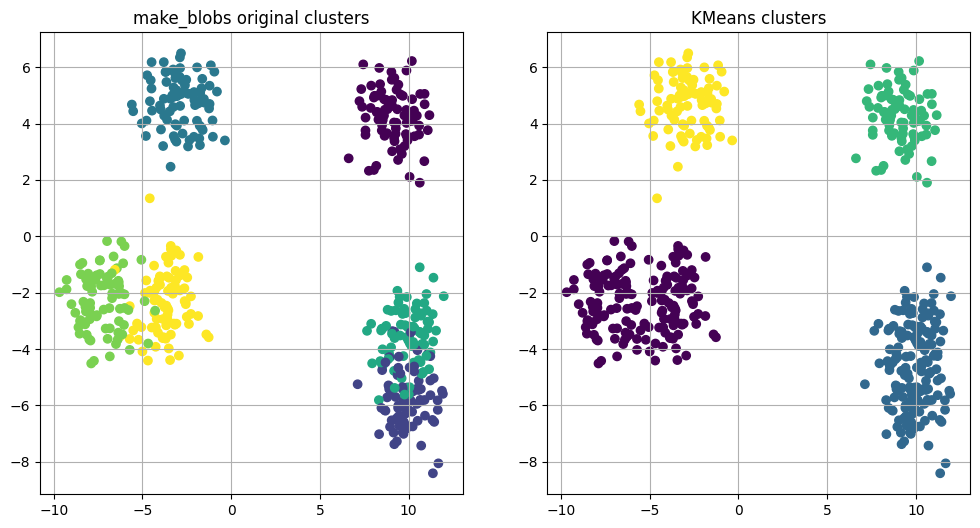

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) # we create a figure with 2 subplots

# plot with the clusters from the make_blobs function
ax1.scatter(data2[:, 0], data2[:, 1], c=original_cluster2)
ax1.set_title('make_blobs original clusters')
ax1.grid(True)

# plot with the clusters from the KMeans algorithm
kmeans = KMeans(n_clusters=4) # we put 4 here because we can see from the elbow method that 4 is the optimal number of clusters
kmeans.fit(data2)
ax2.scatter(data2[:, 0], data2[:, 1], c=kmeans.labels_)
ax2.set_title('KMeans clusters')
ax2.grid(True)

plt.show()

### Implementing K-means Clustering from Scratch

Previously, we used the `KMeans` module from the `sklearn.cluster` library to perform k-means clustering. This library provides a convenient and efficient implementation of the k-means algorithm, allowing us to easily cluster our data.

However, to gain a deeper understanding of how the k-means algorithm works, let's implement it from scratch. By doing so, we can see the inner workings of the algorithm, including how centroids are initialized, how data points are assigned to clusters, and how centroids are updated iteratively.

In the following cells, we will:

1. **Initialize Centroids**: Randomly select k data points as the initial centroids.
2. **Assign Clusters**: Assign each data point to the nearest centroid.
3. **Update Centroids**: Calculate the new centroids as the mean of the data points assigned to each cluster.
4. **Iterate**: Repeat the assignment and update steps until the centroids converge or a maximum number of iterations is reached.

Let's dive into the implementation!

In [13]:
def initialize_centroids(data, k):
    """Randomly initialize centroids from the data points."""
    indices = np.random.choice(data.shape[0], k, replace=False) # randomly choose k indices from the data
    return data[indices] # return the data points at the chosen indices as the initial centroids

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2) # calculate the distance of each data point to each centroid
    return np.argmin(distances, axis=1) # return the index of the centroid that is closest to each data point

def update_centroids(data, labels, k):
    """Update centroids as the mean of the data points assigned to each cluster."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)]) # calculate the mean of the data points assigned to each cluster
    return new_centroids # return the new centroids

def kmeans_implemented(data, k, max_iters=100, tol=1e-4): # max_iters is the maximum number of iterations and tol is the tolerance for the stopping criterion
    """K-means clustering algorithm."""
    centroids = initialize_centroids(data, k) # initialize centroids from previusly defined function
    for _ in range(max_iters): # iterate over the maximum number of iterations
        labels = assign_clusters(data, centroids) # assign each data point to the nearest centroid from previously defined function
        new_centroids = update_centroids(data, labels, k) # update the centroids from previously defined function
        if np.all(np.abs(new_centroids - centroids) < tol): # check if the stopping criterion is met
            break # if the stopping criterion is met, break the loop
        centroids = new_centroids # update the centroids
    return centroids, labels # return the final centroids and the labels



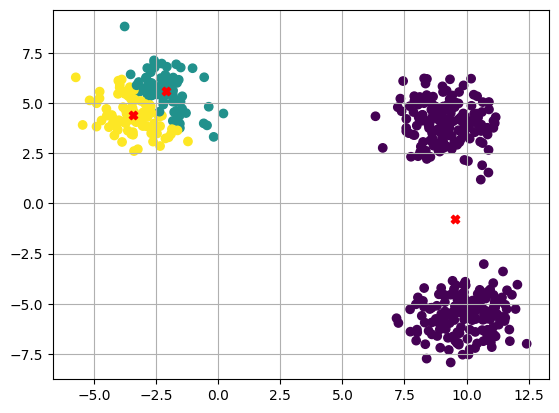

In [14]:
k = 3 # number of clusters since we can see from the elbow method that 3 is the optimal number of clusters
centroids, labels = kmeans_implemented(data, k)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')
plt.grid(True)
plt.show()

-----------

### Applying K-means Clustering on the Iris Dataset

Now that we have covered the most important aspects of k-means clustering, including how it works, how to determine the optimal number of clusters using the elbow method, and even implementing the algorithm from scratch, let's apply k-means clustering to a well-known dataset: the Iris dataset.

The Iris dataset is a classic dataset in machine learning and statistics, consisting of 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The dataset is often used for testing and benchmarking clustering algorithms.

In the following cells, we will:

1. Load the Iris dataset.
2. Apply k-means clustering to the dataset.
3. Visualize the resulting clusters.
4. Compare the clusters with the actual species of the iris flowers.

Let's get started!


In [15]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data[:,1:] # get the data from the dataset and remove the first column so we would have 3 features instead of 4 and target 
iris_target = iris.target 
iris_feature_names = iris.feature_names[1:]

In [16]:
# we can use the pandas library to create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris_data, columns=iris_feature_names)
iris_df['species'] = iris.target_names[iris_target]

# Display the first few rows of the Iris dataset
iris_df.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


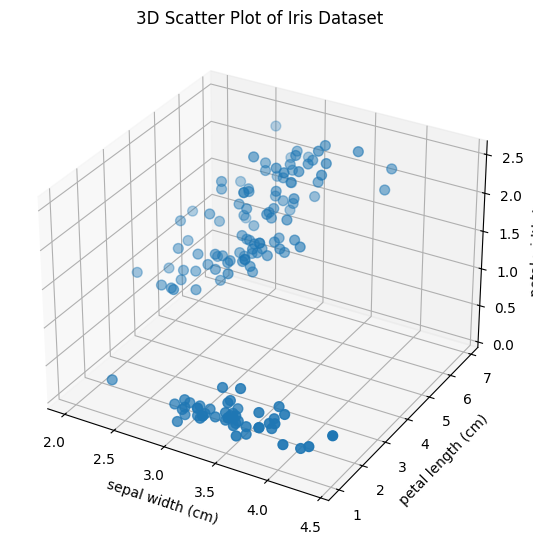

In [17]:
# 3D Plot for the Iris dataset
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

scatter = ax.scatter(
    iris_data[:, 0],  # Feature 1 - Sepal Width
    iris_data[:, 1],  # Feature 2 - Petal Length
    iris_data[:, 2],  # Feature 3 - Petal Width
    s=50  # Point size
)

#labels
ax.set_xlabel(iris_feature_names[0])
ax.set_ylabel(iris_feature_names[1])
ax.set_zlabel(iris_feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")


plt.show()

### Checking the Elbow Method on the Iris Dataset

Now that we have applied k-means clustering to the Iris dataset, let's use the elbow method to determine the optimal number of clusters for this dataset. We will use the `elbow_method` function defined earlier to plot the inertia values for a range of cluster numbers and identify the elbow point.

Let's proceed with the analysis!

elbow_method(iris_data, range(1, 11))

### Checking the Elbow Method on the Iris Dataset

Let's use the elbow method to determine the optimal number of clusters for this dataset. We will use the `elbow_method` function defined earlier to plot the inertia values for a range of cluster numbers and identify the elbow point.


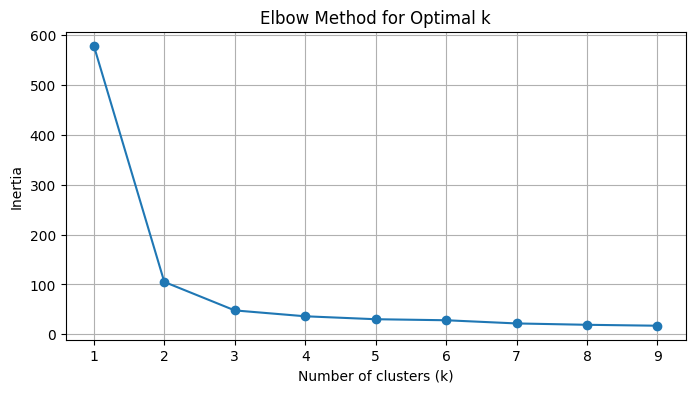

In [18]:
elbow_method(iris_data, range(1, 10))

From this, we see that the possible elbow points are 2 and 3. We will choose 3 because it provides a better balance between the number of clusters and the inertia. Choosing 3 clusters allows us to capture more structure in the data without overfitting, as indicated by the significant drop in inertia from 2 to 3 clusters. <br>

#### Kmeans module:

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_data)
labels = kmeans.labels_


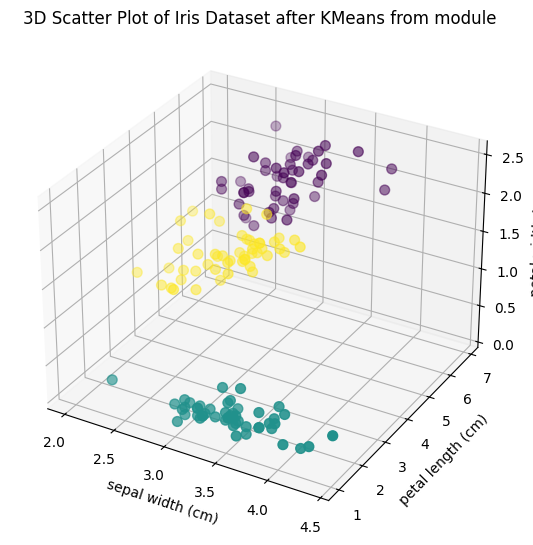

In [20]:
# 3D Plot for the Iris dataset after kmeans from module
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

scatter = ax.scatter(
    iris_data[:, 0],  # Feature 1 - Sepal Width
    iris_data[:, 1],  # Feature 2 - Petal Length
    iris_data[:, 2],  # Feature 3 - Petal Width
    c = labels,
    s=50  # Point size
)

#labels
ax.set_xlabel(iris_feature_names[0])
ax.set_ylabel(iris_feature_names[1])
ax.set_zlabel(iris_feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset after KMeans from module")


plt.show()

#### our implementation:

In [21]:
k = 3 # number of clusters since we can see from the elbow method that 3 is the optimal number of clusters
centroids_implementation, labels_implementation = kmeans_implemented(iris_data, k)

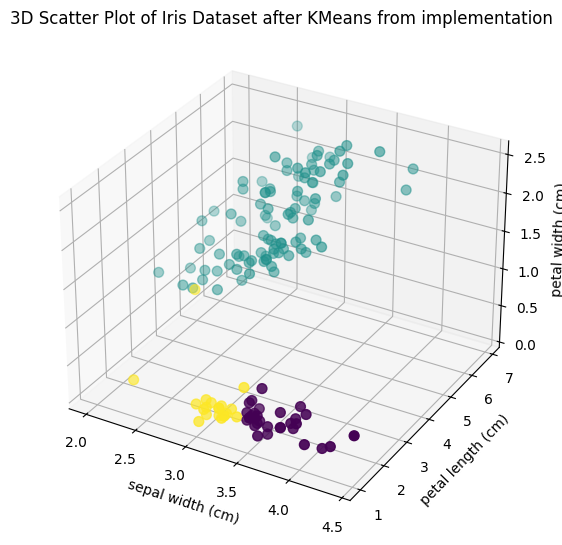

In [22]:
# 3D Plot for the Iris dataset after kmeans from module
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

scatter = ax.scatter(
    iris_data[:, 0],  # Feature 1 - Sepal Width
    iris_data[:, 1],  # Feature 2 - Petal Length
    iris_data[:, 2],  # Feature 3 - Petal Width
    c = labels_implementation,
    s=50  # Point size
)

#labels
ax.set_xlabel(iris_feature_names[0])
ax.set_ylabel(iris_feature_names[1])
ax.set_zlabel(iris_feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset after KMeans from implementation")


plt.show()

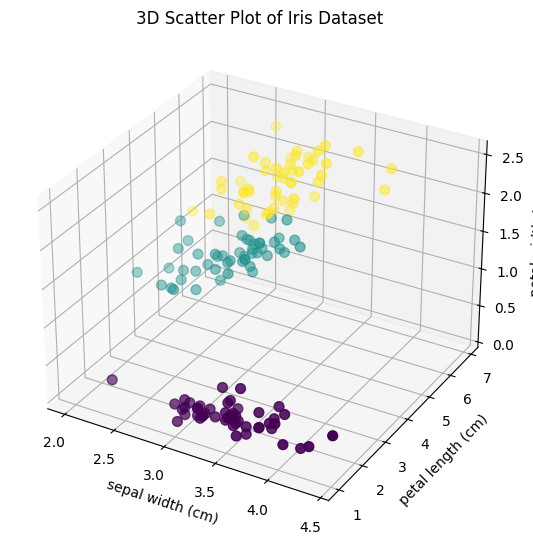

In [24]:
# 3D Plot for the Iris dataset to see the target values
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

scatter = ax.scatter(
    iris_data[:, 0],  # Feature 1 - Sepal Width
    iris_data[:, 1],  # Feature 2 - Petal Length
    iris_data[:, 2],  # Feature 3 - Petal Width
    c = iris_target,
    s=50  # Point size
)

#labels
ax.set_xlabel(iris_feature_names[0])
ax.set_ylabel(iris_feature_names[1])
ax.set_zlabel(iris_feature_names[2])
ax.set_title("3D Scatter Plot of Iris Dataset")


plt.show()

### Task for you:
Run the k-means for: new blobs from make_blobs function and/or the dataset of your choice<br>  
1) check the elbow point and select the proper k
2) run kmeans using the sklearn module
3) run the implemented version after making sure you understand the code
4) plot both kmeans results
5) compare the K-means clustering results with the original targets

Disclaimer: <br>
- If you decide to work with a dataset, you may consider reducing the number of features to simplify visualization; 
- If you choose a dataset with a higher number of features, you don't need to visualize all of them.
- You can reuse the code provided for plotting make_blobs graphs.